# Exploratory Data Analysis

**변수 설명**
* `A10 Autism Spectrum Quotient` : AQ-10으로 불리는 시험으로 10개의 문항을 가지고 자폐인인지 판단할 수 있는 참고용 설문지. 수치형(0, 1)
* `Social Responsiveness Scale` : 부모나 교사에게 아동이 보인 사회적 상호작용의 특징에 대해 질문하는 설문지로, 점수가 높을수록 사회적 기능이 낮음을 의미. 수치형(0 ~ 10)
* `Age_Years` : 나이. 수치형(1 ~ 18)
* `Qchat_10_Score` : AQ-10 10문항의 합(총점). 수치형(0 ~ 10)
* `Speech Delay/Language Disorder` : 말하거나 언어에 대한 지연 및 장애. 논리값
* `Learning disorder` : 배우는데 존재한 장애. 논리값
* `Genetic Disorders` : 장애에 대한 유전. 논리값
* `Depression` : 우울함. 논리값
* `Global developmental delay/intellectual disability` : 전반적인 발달 지연 및 지적 장애. 논리값
* `Social/Behavioural Issues` : 사회적, 행동적 문제
* `Childhood Autism Rating Scale` : 부모가 쉽게 이용할 수 있는 자폐 진단 테스트의 점수. 수치형(1 ~ 4)
* `Anxiety disorder` : 불안 장애. 논리값
* `Sex` : 성별. 범주형(M, F)
* `Ethnicity` : 인종. 범주형(Asian, Black, Hispanic, Latino, Middle Eastern, Mixed, Native Indian, Others, PaciFica, South Asian, White European)
* `Jaundice` : 황달. 논리값
* `Family mem with ASD` : 가족 구성원 중 ASD를 가지고 있는지 여부. 논리값
* `Who completed the test` : 테스트를 진행한 사람. 범주형(Family Memeber, Health Care Professional, Others, School and NGO, Self)
* **`ASD traits`** : ASD 여부

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
from sklearn.preprocessing import OrdinalEncoder

In [2]:
df = pd.read_csv("/home/jovyan/work/_dataset/data_csv.csv")
df.head()

,CASE_NO_PATIENT'S,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,Global developmental delay/intellectual disability,Social/Behavioural Issues,Childhood Autism Rating Scale,Anxiety_disorder,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who_completed_the_test,ASD_traits
0,1,0,0,0,0,0,0,1,1,0,...,Yes,Yes,1,Yes,F,middle eastern,Yes,No,Family Member,No
1,2,1,1,0,0,0,1,1,0,0,...,Yes,Yes,2,Yes,M,White European,Yes,No,Family Member,Yes
2,3,1,0,0,0,0,0,1,1,0,...,Yes,Yes,4,Yes,M,Middle Eastern,Yes,No,Family Member,Yes
3,4,1,1,1,1,1,1,1,1,1,...,Yes,Yes,2,Yes,M,Hispanic,No,No,Family Member,Yes
4,5,1,1,0,1,1,1,1,1,1,...,Yes,Yes,1,Yes,F,White European,No,No,Family Member,Yes


In [3]:
df.info() # 데이터셋 정보 출력

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1985 entries, 0 to 1984
Data columns (total 28 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   CASE_NO_PATIENT'S                                   1985 non-null   int64  
 1   A1                                                  1985 non-null   int64  
 2   A2                                                  1985 non-null   int64  
 3   A3                                                  1985 non-null   int64  
 4   A4                                                  1985 non-null   int64  
 5   A5                                                  1985 non-null   int64  
 6   A6                                                  1985 non-null   int64  
 7   A7                                                  1985 non-null   int64  
 8   A8                                                  1985 non-null   int64  
 9

In [4]:
describe = df.select_dtypes("number").describe().T

# df에서 숫자형 변수만 추출한 후 Skew, Kurtosis 변수 생성
describe['skew'] = df.select_dtypes("number").skew().values
describe['kurtosis'] = df.select_dtypes("number").kurt().values
describe = round(describe, 2)
describe

,count,mean,std,min,25%,50%,75%,max,skew,kurtosis
CASE_NO_PATIENT'S,1985.0,993.00,573.16,1.0,497.0,993.0,1489.0,1985.0,0.00,-1.20
A1,1985.0,0.30,0.46,0.0,0.0,0.0,1.0,1.0,0.88,-1.23
A2,1985.0,0.24,0.43,0.0,0.0,0.0,0.0,1.0,1.23,-0.49
A3,1985.0,0.21,0.41,0.0,0.0,0.0,0.0,1.0,1.40,-0.03
A4,1985.0,0.27,0.45,0.0,0.0,0.0,1.0,1.0,1.03,-0.95
A5,1985.0,0.28,0.45,0.0,0.0,0.0,1.0,1.0,0.99,-1.02
A6,1985.0,0.31,0.46,0.0,0.0,0.0,1.0,1.0,0.84,-1.29
A7,1985.0,0.35,0.48,0.0,0.0,0.0,1.0,1.0,0.65,-1.58
A8,1985.0,0.24,0.43,0.0,0.0,0.0,0.0,1.0,1.19,-0.57
A9,1985.0,0.26,0.44,0.0,0.0,0.0,1.0,1.0,1.10,-0.80


**Skewness(왜도)**
* 정규 분포에서 데이터 분포의 대칭성이 얼마나 왜곡 되었는지 나타냄
* 음수인 경우 정규분포가 우측으로 치우처짐, 0인 경우 정규분포 꼴, 양수인 경우 정규분포가 좌측으로 치우처짐
* 값의 절대값이 0.5 이하인 경우 데이터는 상당히 대칭적
* 절대값이 0.5 ~ 1인 경우 적당히 치우쳐 있음
* 절대값이 1 이상인 경우 상당히 치우져 있음

**Kurtosis(첨도)**
* 분포에 존재하는 특이치에 대한 척도
* 3 이상이면 분포가 길고, 꼬리가 뚱뚱한 형태. 특이치가 많다는 것을 의미
* 3 미만이면 분포가 짧고, 꼬리가 정규분포보다 얇음. 특이치가 작은 것을 의미

In [5]:
# 범주형 값 확인
object_cols = df.select_dtypes('O').columns

object_df = pd.DataFrame({
    'Objects': object_cols,
    'Unique values': [df[col].unique() for col in object_cols],
    'number of unique values':[df[col].nunique()for col in object_cols]
})

object_df

,Objects,Unique values,number of unique values
0,Speech Delay/Language Disorder,"[Yes, No]",2
1,Learning disorder,"[Yes, No]",2
2,Genetic_Disorders,"[Yes, No]",2
3,Depression,"[Yes, No, nan]",2
4,Global developmental delay/intellectual disabi...,"[Yes, No]",2
5,Social/Behavioural Issues,"[Yes, nan, No]",2
6,Anxiety_disorder,"[Yes, No]",2
7,Sex,"[F, M]",2
8,Ethnicity,"[middle eastern, White European, Middle Easter...",16
9,Jaundice,"[Yes, No]",2


### 결측치 제거

In [6]:
df = df.dropna(axis=0)

In [7]:
df.isnull().sum()

CASE_NO_PATIENT'S                                     0
A1                                                    0
A2                                                    0
A3                                                    0
A4                                                    0
A5                                                    0
A6                                                    0
A7                                                    0
A8                                                    0
A9                                                    0
A10_Autism_Spectrum_Quotient                          0
Social_Responsiveness_Scale                           0
Age_Years                                             0
Qchat_10_Score                                        0
Speech Delay/Language Disorder                        0
Learning disorder                                     0
Genetic_Disorders                                     0
Depression                                      

### 범주형 변수 범주 통합

Ethnicity, Who_completed_the_test 변수 범주 통합

In [8]:
# Ethnicity이 Asian, asian 이렇게 분리된 경우가 있어서 이를 통합
new_ethnicity = list(map(str.upper, df['Ethnicity'].to_list()))

# Who_completed_the_test 변수도 분리되어 있어서 이를 통합
new_who_completed = list(map(str.upper, df['Who_completed_the_test'].to_list()))

# dataset 생성
dataset = df.copy()

dataset['Ethnicity'] = new_ethnicity
dataset['Who_completed_the_test'] = new_who_completed

### 최종 데이터셋

In [9]:
dataset.head()

,CASE_NO_PATIENT'S,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,Global developmental delay/intellectual disability,Social/Behavioural Issues,Childhood Autism Rating Scale,Anxiety_disorder,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who_completed_the_test,ASD_traits
0,1,0,0,0,0,0,0,1,1,0,...,Yes,Yes,1,Yes,F,MIDDLE EASTERN,Yes,No,FAMILY MEMBER,No
1,2,1,1,0,0,0,1,1,0,0,...,Yes,Yes,2,Yes,M,WHITE EUROPEAN,Yes,No,FAMILY MEMBER,Yes
2,3,1,0,0,0,0,0,1,1,0,...,Yes,Yes,4,Yes,M,MIDDLE EASTERN,Yes,No,FAMILY MEMBER,Yes
3,4,1,1,1,1,1,1,1,1,1,...,Yes,Yes,2,Yes,M,HISPANIC,No,No,FAMILY MEMBER,Yes
4,5,1,1,0,1,1,1,1,1,1,...,Yes,Yes,1,Yes,F,WHITE EUROPEAN,No,No,FAMILY MEMBER,Yes


### 시각화

In [17]:
import plotly.express as px
fig = px.pie(df, names = "ASD_traits",
             title = "<b>Ratio of Autism Spectrum Disorder</b>")

fig.update_traces(textposition='inside',
                  textinfo = 'percent+label')

fig.update_layout(title_x = 0.5,
                  title_font = dict(size = 20),
                  uniformtext_minsize = 15)

fig.show()

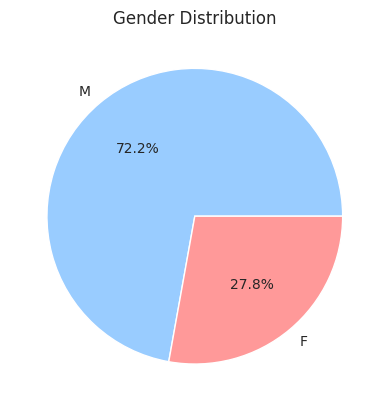

In [18]:
# Calculate the counts for each category
counts = dataset['Sex'].value_counts()

# Create a pie chart
fig, ax = plt.subplots()
ax.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=['#99CCFF', '#FF9999'])
ax.set_title('Gender Distribution')

plt.show()

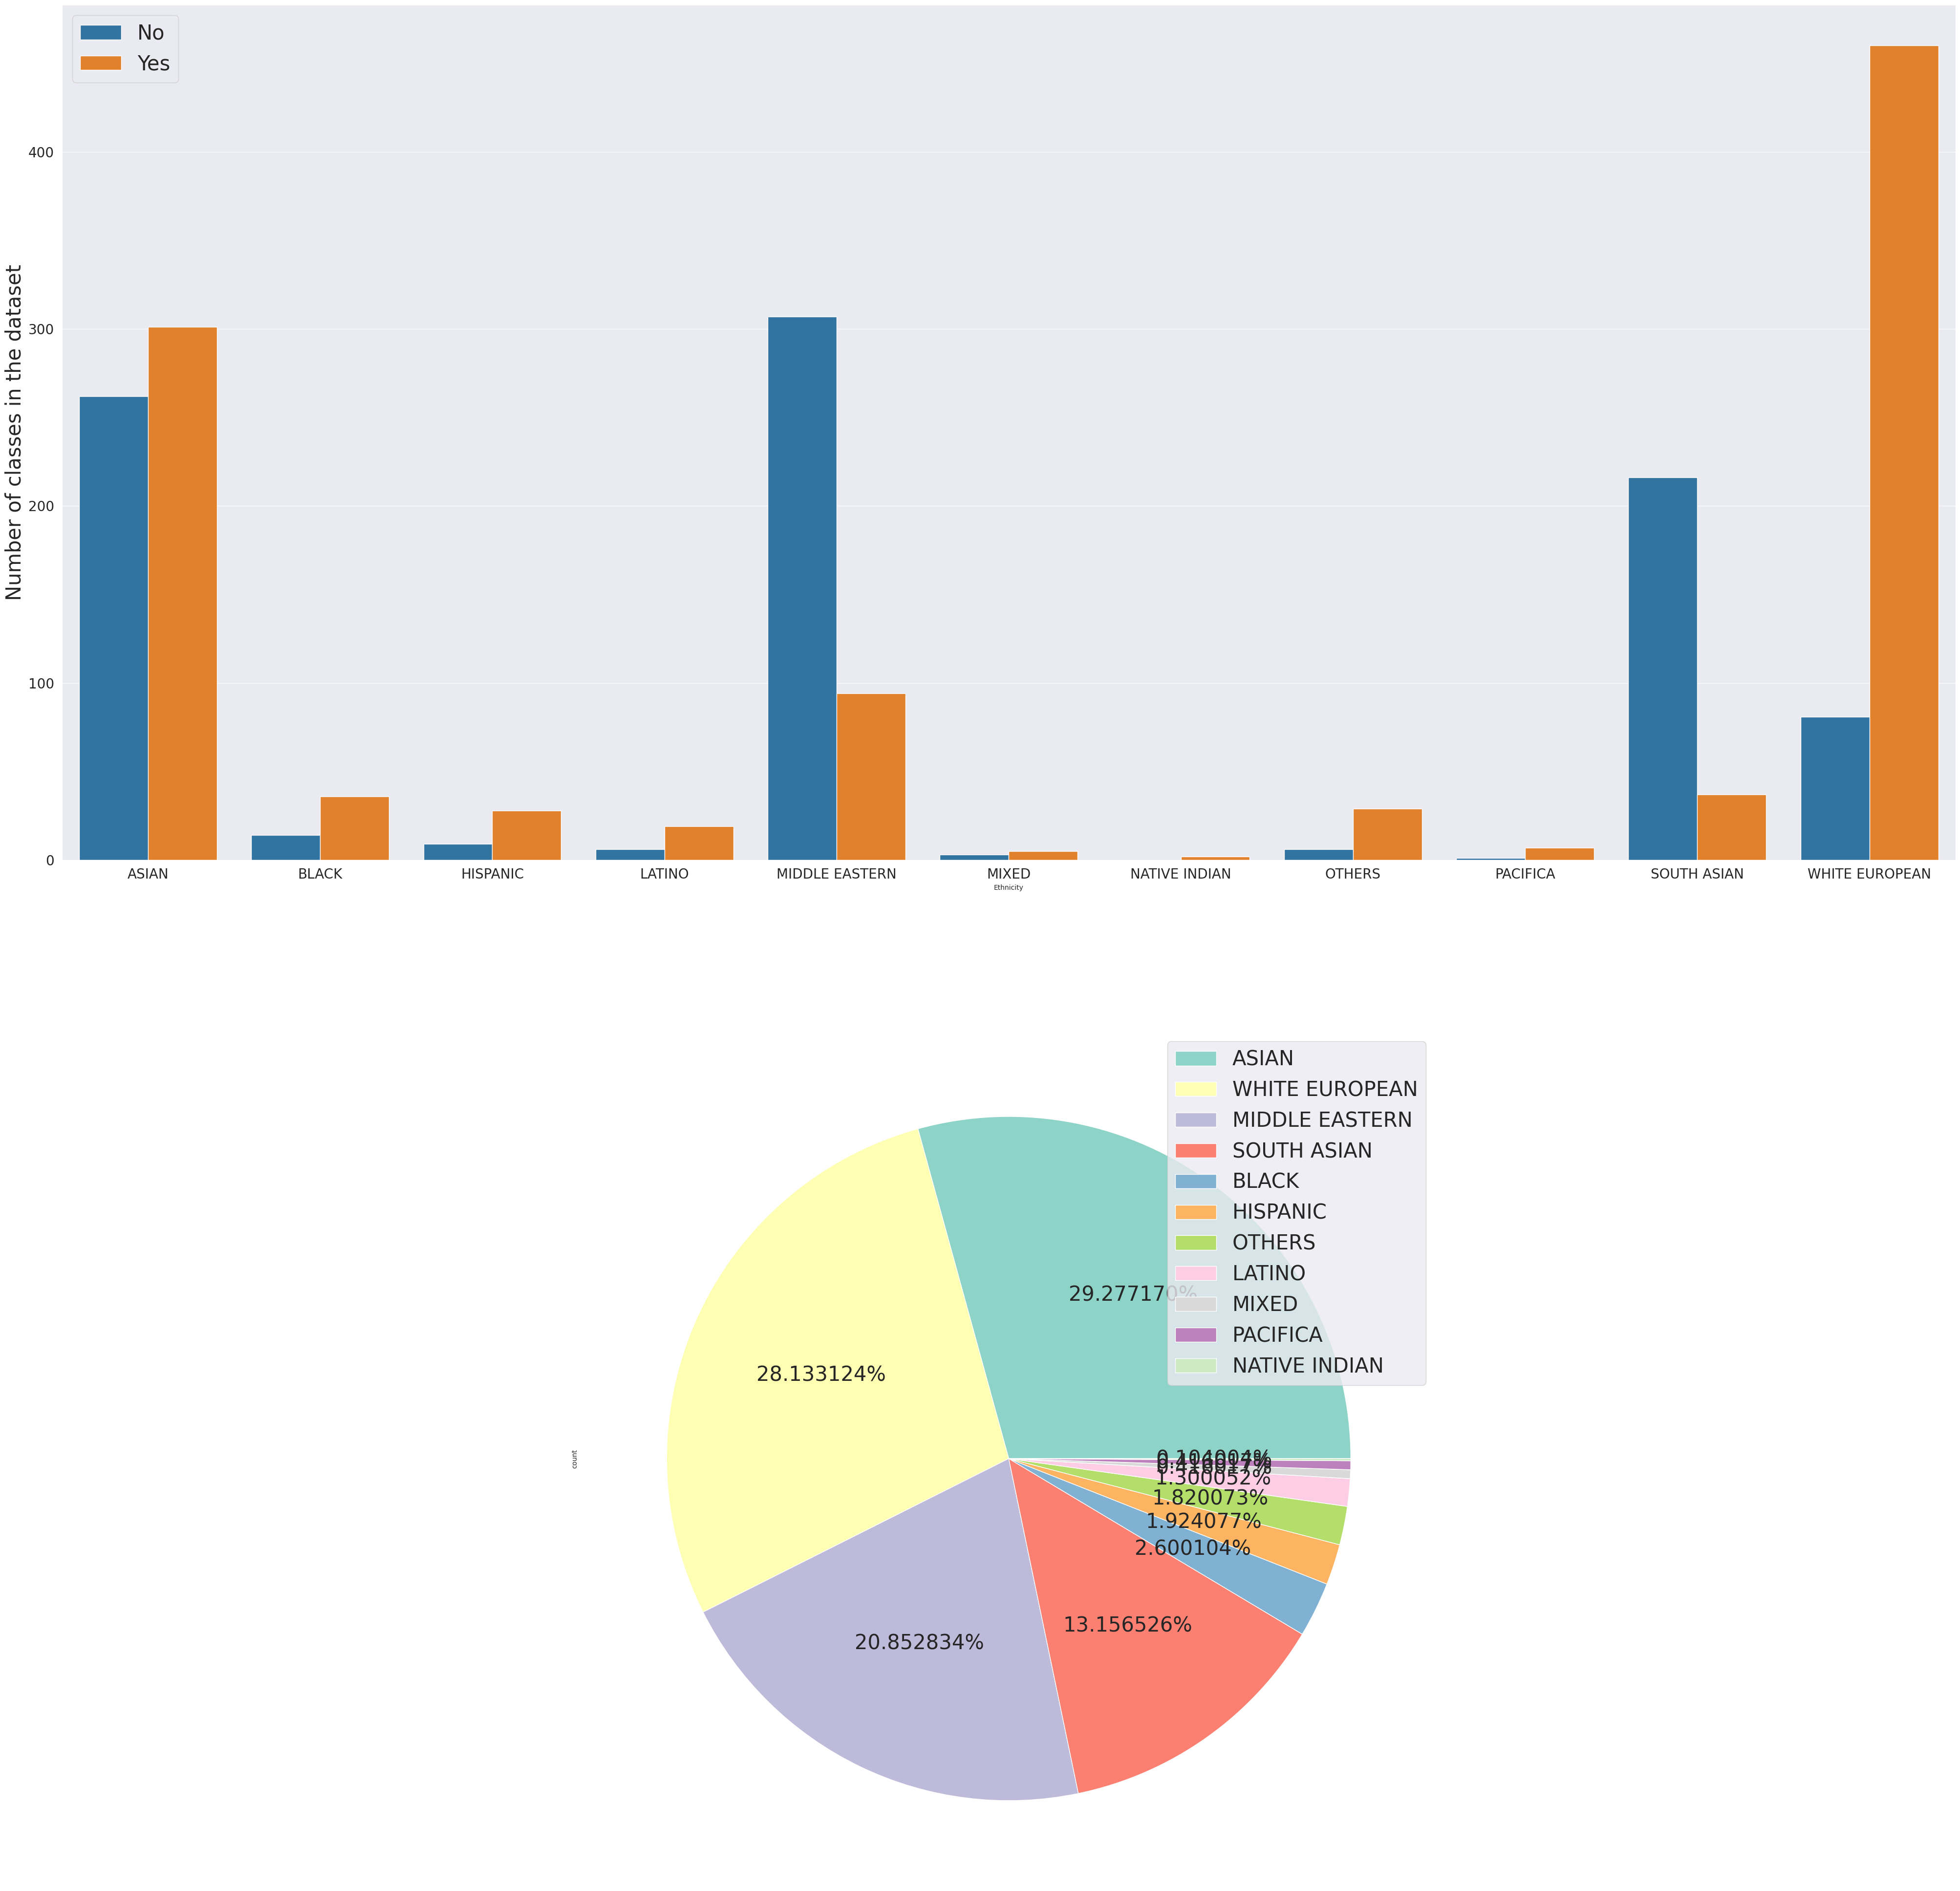

In [66]:
fig, ax = plt.subplots(2, 1, figsize=(35, 20))  # Increase the height of the figure

# Group the data by 'Ethnicity' and 'ASD_traits' columns and count the occurrences
grouped_data = dataset.groupby(['Ethnicity', 'ASD_traits']).size().reset_index(name='Count')

# Plot the bar plot with hue as 'ASD_traits'
target_counts_barplot = sns.barplot(x='Ethnicity', y='Count', hue='ASD_traits', data=grouped_data, ax=ax[0])
target_counts_barplot.set_ylabel('Number of classes in the dataset', fontsize=30)  # Increase the font size
target_counts_barplot.tick_params(axis='x', labelsize=20, width=2, length=8)  # Increase x-axis number size and thickness
target_counts_barplot.tick_params(axis='y', labelsize=20, width=2, length=8)  # Increase y-axis number size and thickness


# Count the occurrences of each ethnicity in the original data
ethnicity_counts = dataset['Ethnicity'].value_counts()

# Specify a separate figsize for the pie chart
target_counts_pie = ethnicity_counts.plot.pie(autopct="%3f%%", ax=ax[1], colors=sns.color_palette('Set3'), figsize=(50, 50),
                                              fontsize=30, labeldistance=None)  # Increase the font size
ax[0].legend(fontsize=30)  # Increase the font size of the legend
ax[1].legend(fontsize=30)  # Increase the font size of the legend

plt.show()

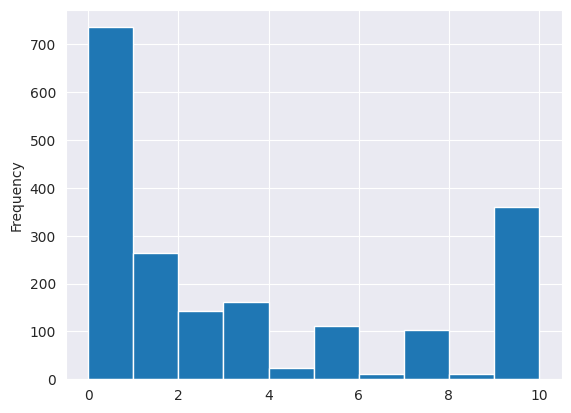

In [67]:
dataset.Social_Responsiveness_Scale.plot(kind ='hist',grid =True)
plt.show()

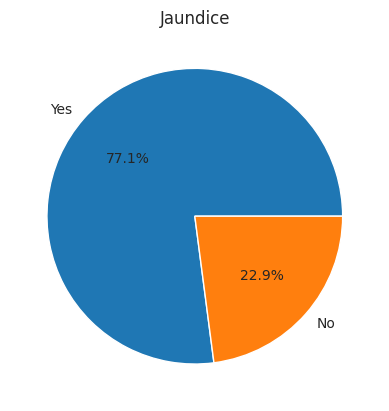

In [68]:
# Calculate the counts for each category
counts = dataset['Jaundice'].value_counts()

# Create a pie chart
fig, ax = plt.subplots()
ax.pie(counts, labels=counts.index, autopct='%1.1f%%')
ax.set_title('Jaundice')

plt.show()

In [69]:
# 각 범주형 변수별로 값이 "YES"이면서 ASD인 확률, "NO"이면서 ASD가 아닌 확률

groups = ['Anxiety_disorder', 'Jaundice', 'Family_mem_with_ASD', 'Social/Behavioural Issues',
          'Learning disorder', 'Global developmental delay/intellectual disability',
          'Speech Delay/Language Disorder', 'Genetic_Disorders']

data_dict = {'Index': [], 'ASD Positive': [], 'Non-ASD': []}

for col in groups:
    asd_positive_count = dataset[(dataset['ASD_traits'] == "Yes") & (dataset[col] =='Yes')].shape[0]
    non_asd_count = dataset[(dataset['ASD_traits'] == "No") & (dataset[col] =='Yes')].shape[0]

    data_dict['Index'].append(col)
    data_dict['ASD Positive'].append(asd_positive_count)
    data_dict['Non-ASD'].append(non_asd_count)

df1 = pd.DataFrame(data_dict)

# Calculate the percentage of each column relative to the other
df1['ASD Positive %'] = df1['ASD Positive'] / (df1['ASD Positive'] + df1['Non-ASD'])
df1['Non-ASD %'] = df1['Non-ASD'] / (df1['ASD Positive'] + df1['Non-ASD'])

# Apply formatting to highlight cells based on their percentage values relative to the other column
styled_df = df1.style.bar(subset=['ASD Positive %'], color='#84A9AC').bar(subset=['Non-ASD %'], color='#FDBE87')

styled_df

,Index,ASD Positive,Non-ASD,ASD Positive %,Non-ASD %
0,Anxiety_disorder,709,319,0.689689,0.310311
1,Jaundice,844,638,0.569501,0.430499
2,Family_mem_with_ASD,437,167,0.723510,0.276490
3,Social/Behavioural Issues,711,320,0.689622,0.310378
4,Learning disorder,717,333,0.682857,0.317143
5,Global developmental delay/intellectual disability,712,319,0.690592,0.309408
6,Speech Delay/Language Disorder,713,321,0.689555,0.310445
7,Genetic_Disorders,683,308,0.689203,0.310797


In [70]:
# ASD 환자중에 Q10 검사에서 각 문항에 응답한 성비

# Filter out rows with 'YES' in the 'Class/ASD' column
asd_data = dataset[dataset['ASD_traits'] == 'Yes']

# Group the data by gender and compute the sum of each symptom column
gender_totals = asd_data.groupby('Sex').sum().iloc[:, 1:10]

# Calculate the percentage values by dividing the summed values by the row sums
percentage_data = gender_totals.div(gender_totals.sum(axis=1), axis=0) * 100

# Reshape the percentage data frame into a long format using the 'melt' function
melted_data = pd.melt(percentage_data.reset_index(), id_vars='Sex', var_name='symptom', value_name='percentage')

# Create a bar plot to visualize the percentage of symptoms by gender
fig = px.bar(melted_data, x='symptom', y='percentage', color='Sex',
             color_discrete_map={'M': 'lightblue', 'F': 'pink'})
fig.show()

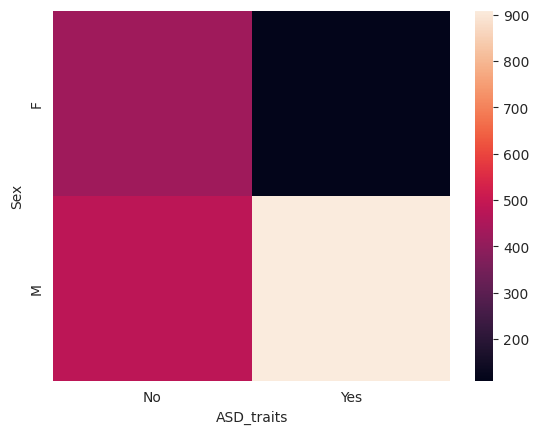

In [71]:
# 성별 ASD
sns.heatmap(pd.crosstab(dataset.Sex,dataset.ASD_traits))
plt.show()

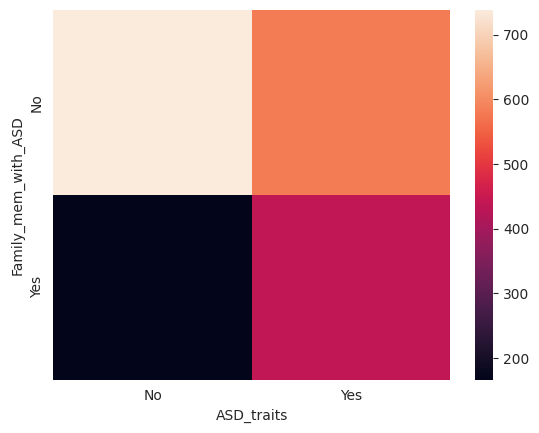

In [72]:
# Family mem with ASD 별 ASD
sns.heatmap(pd.crosstab(dataset.Family_mem_with_ASD, dataset.ASD_traits))
plt.show()

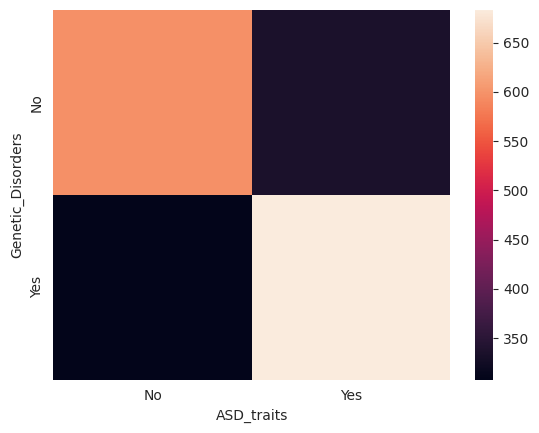

In [73]:
# Genetic Disorders 별 ASD
sns.heatmap(pd.crosstab(dataset.Genetic_Disorders, dataset.ASD_traits))
plt.show()

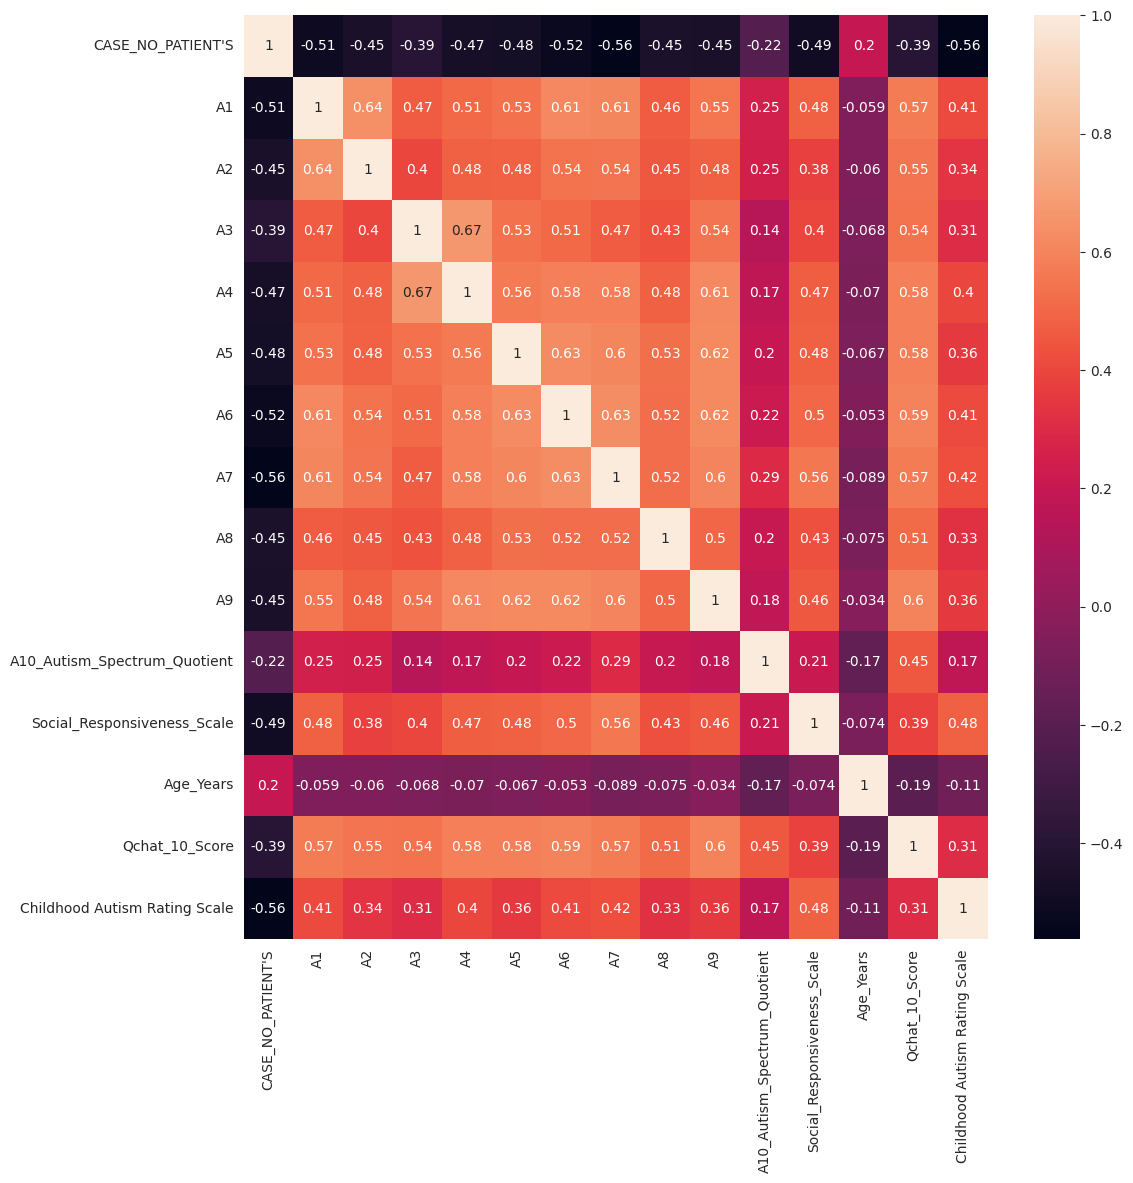

In [74]:
# 수치형 변수만 모아 상관계수 파악
plt.figure(figsize = (12,12))
sns.heatmap(dataset.select_dtypes(['float64','int64']).corr(),annot =True)
plt.show()

### 고급 히트맵 시각화
* 범주형 변수를 모두 수치형으로 변환 후 상관관계 히트맵 그리기

In [75]:
dataset_numeric = dataset.copy() # 복사

dataset_numeric.drop("CASE_NO_PATIENT'S", axis=1, inplace=True) # 환자 ID 제거

encoder = OrdinalEncoder()

# Ethnicity 변환
new_ethnicity = encoder.fit_transform(np.array(new_ethnicity).reshape(-1, 1))
dataset_numeric['Ethnicity'] = new_ethnicity

# Who_completed_the_test 변환
new_who_completed = encoder.fit_transform(np.array(new_who_completed).reshape(-1, 1))
dataset_numeric['Who_completed_the_test'] = new_who_completed

In [76]:
yes_no_columns = ['Social_Responsiveness_Scale', 'Speech Delay/Language Disorder', 'Learning disorder', 'Genetic_Disorders', 'Depression', 'Global developmental delay/intellectual disability', 'Social/Behavioural Issues', 'Anxiety_disorder', 'Jaundice', 'Family_mem_with_ASD', 'ASD_traits']

for column in yes_no_columns:
    dataset_numeric[column] = dataset_numeric[column].replace({'Yes': 1.0, 'No': 0.0})

# 성별 수치형 변환
dataset_numeric['Sex'] = dataset_numeric['Sex'].replace({'M': 0.0, 'F': 1.0})

In [77]:
dataset_numeric.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10_Autism_Spectrum_Quotient,...,Global developmental delay/intellectual disability,Social/Behavioural Issues,Childhood Autism Rating Scale,Anxiety_disorder,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who_completed_the_test,ASD_traits
0,0,0,0,0,0,0,1,1,0,1,...,1.0,1.0,1,1.0,1.0,4.0,1.0,0.0,0.0,0.0
1,1,1,0,0,0,1,1,0,0,0,...,1.0,1.0,2,1.0,0.0,10.0,1.0,0.0,0.0,1.0
2,1,0,0,0,0,0,1,1,0,1,...,1.0,1.0,4,1.0,0.0,4.0,1.0,0.0,0.0,1.0
3,1,1,1,1,1,1,1,1,1,1,...,1.0,1.0,2,1.0,0.0,2.0,0.0,0.0,0.0,1.0
4,1,1,0,1,1,1,1,1,1,1,...,1.0,1.0,1,1.0,1.0,10.0,0.0,0.0,0.0,1.0


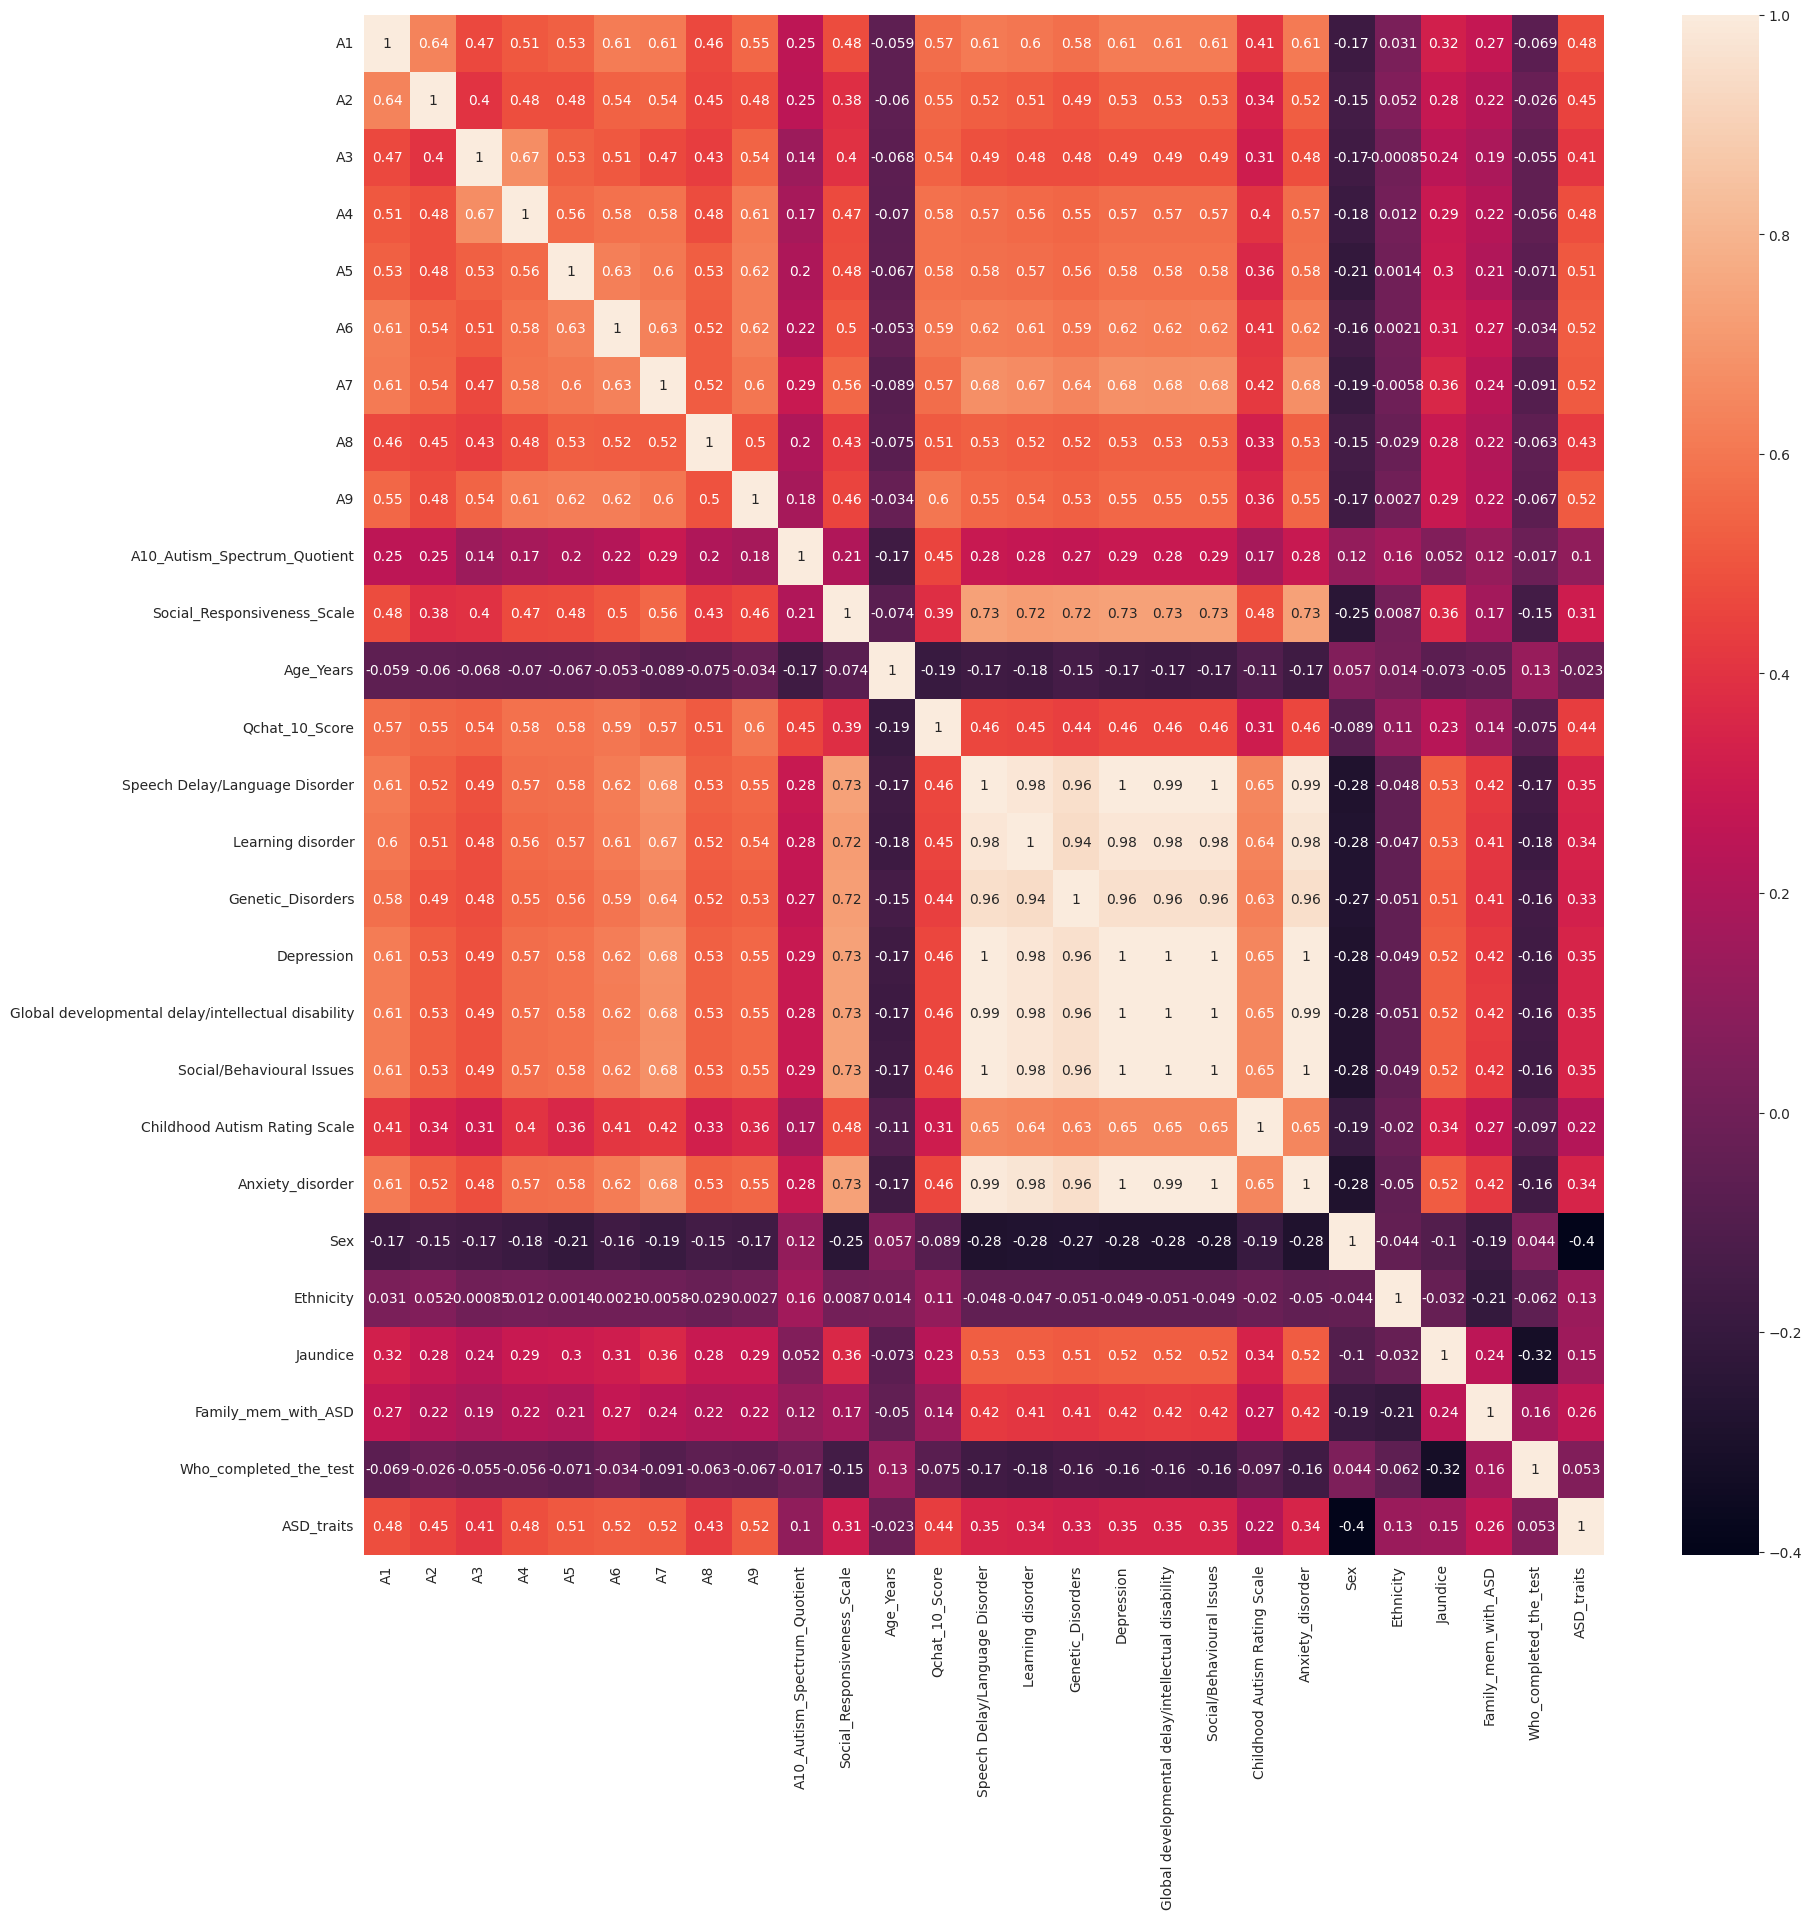

In [78]:
plt.figure(figsize = (20,20))
sns.heatmap(dataset_numeric.corr(),annot =True)
plt.show()